In [12]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2
from matplotlib import pyplot as plt

In [14]:
epochs = 25
batch_size = 32

In [15]:
file_directory = "/content/drive/MyDrive/Colab Notebooks/Data"

# Chargement des données d'entrainement
train_dataset = image_dataset_from_directory(
    file_directory,
    validation_split=0.2,  # 20% pour la validation
    subset="training",
    seed=123,
    image_size=(128, 128),
    batch_size=batch_size
)

# Chargement des donénes de validation
validation_dataset = image_dataset_from_directory(
    file_directory,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=batch_size
)

Found 3762 files belonging to 6 classes.
Using 3010 files for training.
Found 3762 files belonging to 6 classes.
Using 752 files for validation.


In [16]:
#AUTOTUNE = tf.data.AUTOTUNE

#train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
# Normalisation des images
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
    #tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)), #(64, 64)
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)), #(32, 32)
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)), #(16, 16)
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(6, activation='softmax')
])

# permet de d'éviter le surapprentissage
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.01,
                               patience=10, # nombre de cycle à attendre si pas d'amélioration avant de terminer l'entrainement
                               verbose=1,
                               mode='min')

# Sauvegarde le meilleur meilleur modèle renconré pendant l'entrainement
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/model_IA_NewImages.h5',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   mode='min')

callbacks=[early_stopping, model_checkpoint]


#model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 64)       

In [19]:
history = model.fit(train_dataset,
                    batch_size = batch_size,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/25
95/95 [==============================] - ETA: 0s - loss: 1.4312 - accuracy: 0.3983
Epoch 1: val_loss improved from inf to 0.20129, saving model to /content/drive/MyDrive/Colab Notebooks/model_IA_NewImages.h5
95/95 [==============================] - 14s 107ms/step - loss: 1.4312 - accuracy: 0.3983 - val_loss: 0.2013 - val_accuracy: 0.9574
Epoch 2/25
94/95 [============================>.] - ETA: 0s - loss: 0.2269 - accuracy: 0.9338
Epoch 2: val_loss improved from 0.20129 to 0.09301, saving model to /content/drive/MyDrive/Colab Notebooks/model_IA_NewImages.h5
95/95 [==============================] - 7s 67ms/step - loss: 0.2268 - accuracy: 0.9339 - val_loss: 0.0930 - val_accuracy: 0.9694
Epoch 3/25
94/95 [============================>.] - ETA: 0s - loss: 0.1062 - accuracy: 0.9688
Epoch 3: val_loss did not improve from 0.09301
95/95 [==============================] - 7s 60ms/step - loss: 0.1061 - accuracy: 0.9688 - val_loss: 0.0942 - val_accuracy: 0.9681
Epoch 4/25
93/95 [=======

In [20]:
print(history.history)

{'loss': [1.431176781654358, 0.2267538160085678, 0.10614509135484695, 0.08339514583349228, 0.07380779832601547, 0.07465985417366028, 0.06061340495944023, 0.05872306972742081, 0.0504012405872345, 0.05296547710895538, 0.04963800683617592, 0.052018169313669205, 0.054538141936063766, 0.04526819288730621, 0.0409841313958168, 0.04247548431158066, 0.04550556093454361, 0.041122034192085266, 0.04059629887342453, 0.03758048266172409, 0.045398201793432236, 0.042373280972242355, 0.0442427322268486, 0.040459420531988144, 0.038392066955566406], 'accuracy': [0.3983388841152191, 0.9338870644569397, 0.9687707424163818, 0.970099687576294, 0.9727574586868286, 0.970099687576294, 0.9764119386672974, 0.97508305311203, 0.9790697693824768, 0.9790697693824768, 0.9794020056724548, 0.9794020056724548, 0.9770764112472534, 0.9800664186477661, 0.9797342419624329, 0.9820597767829895, 0.9790697693824768, 0.9820597767829895, 0.9813953638076782, 0.9840531349182129, 0.9800664186477661, 0.9813953638076782, 0.982059776782

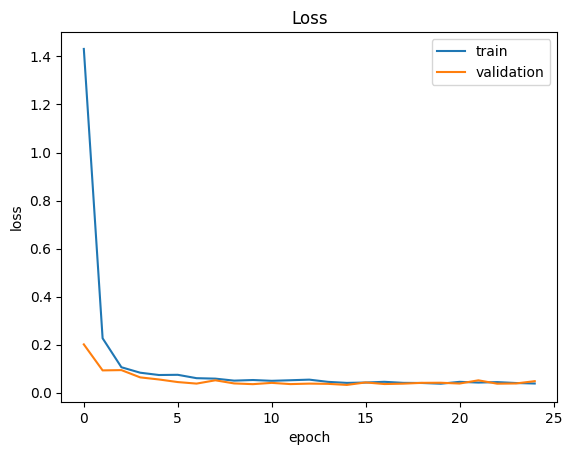

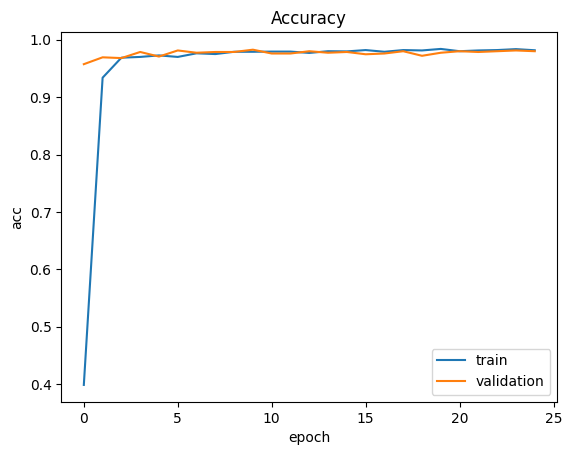

In [21]:
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'validation'])
plt.show()